In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

170498071/170498071 [==============================] - 2s 0us/step
(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

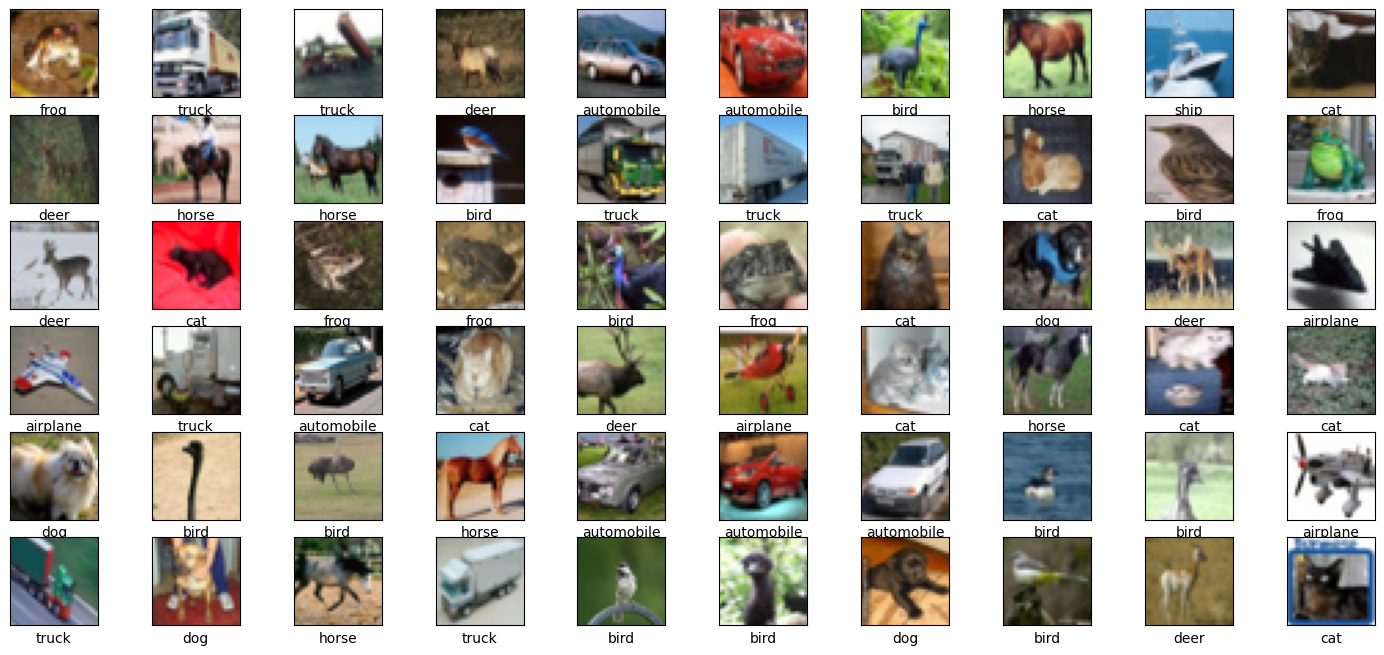

In [4]:
plt.figure(figsize=(18,8))
for i in range(60):
    plt.subplot(6, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model = keras.Sequential([
    ## input layer
    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                        

In [7]:
model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=0.000008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
h = model.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 21s 7ms/step - loss: 2.7740 - accuracy: 0.1591 - val_loss: 2.4710 - val_accuracy: 0.2328
Epoch 2/50
782/782 [==============================] - 5s 7ms/step - loss: 2.3466 - accuracy: 0.2583 - val_loss: 2.2280 - val_accuracy: 0.2935
Epoch 3/50
782/782 [==============================] - 4s 6ms/step - loss: 2.1598 - accuracy: 0.3165 - val_loss: 2.0855 - val_accuracy: 0.3403
Epoch 4/50
782/782 [==============================] - 5s 7ms/step - loss: 2.0385 - accuracy: 0.3611 - val_loss: 1.9880 - val_accuracy: 0.3749
Epoch 5/50
782/782 [==============================] - 4s 6ms/step - loss: 1.9510 - accuracy: 0.3918 - val_loss: 1.9141 - val_accuracy: 0.4019
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.8834 - accuracy: 0.4122 - val_loss: 1.8569 - val_accuracy: 0.4199
Epoch 7/50
782/782 [==============================] - 5s 6ms/step - loss: 1.8284 - accuracy: 0.4312 - val_loss: 1.8105 - val_accuracy: 0.4365
Epoch

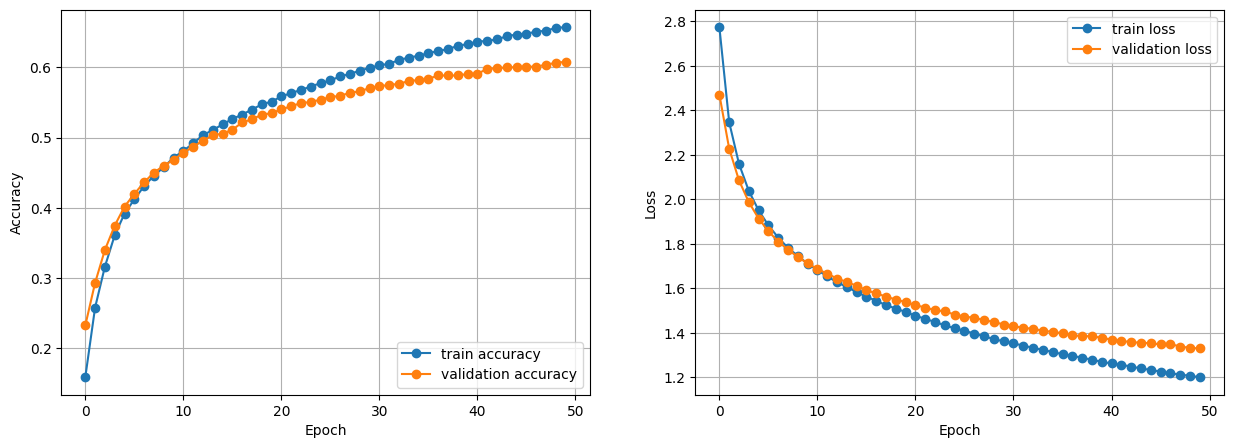

In [9]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [10]:
test_loss, test_acc = model.evaluate(X_test, Y_test)
print('\nTest Accuracy:', test_acc)
print('\nTest Loss:', test_loss)

313/313 [==============================] - 1s 3ms/step - loss: 1.3300 - accuracy: 0.6081

Test Accuracy: 0.6080999970436096

Test Loss: 1.3300470113754272


In [11]:
X_train, X_test = X_train / 255.0, X_test / 255.0

In [12]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model2 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),
    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.0001, l2=0.0001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),
    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_3 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_4 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [13]:
model2.compile(
    optimizer=keras.optimizers.SGD(learning_rate=0.0001, momentum=0.8),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
h = model2.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 7s 7ms/step - loss: 2.4642 - accuracy: 0.2186 - val_loss: 2.2678 - val_accuracy: 0.2778
Epoch 2/50
782/782 [==============================] - 5s 6ms/step - loss: 2.1365 - accuracy: 0.3298 - val_loss: 2.1535 - val_accuracy: 0.3005
Epoch 3/50
782/782 [==============================] - 5s 6ms/step - loss: 2.0018 - accuracy: 0.3745 - val_loss: 2.0468 - val_accuracy: 0.3554
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 1.9182 - accuracy: 0.4053 - val_loss: 1.9889 - val_accuracy: 0.3639
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 1.8518 - accuracy: 0.4291 - val_loss: 1.8486 - val_accuracy: 0.4233
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 1.7998 - accuracy: 0.4475 - val_loss: 1.8504 - val_accuracy: 0.4253
Epoch 7/50
782/782 [==============================] - 4s 5ms/step - loss: 1.7574 - accuracy: 0.4617 - val_loss: 1.8732 - val_accuracy: 0.3998
Epoch 

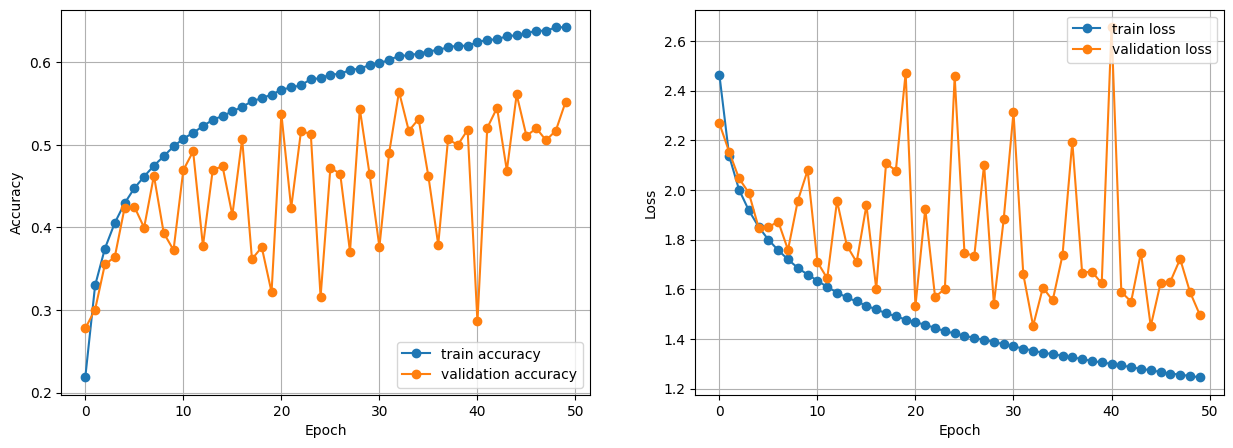

In [15]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [16]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.regularizers import l1_l2

model3 = keras.Sequential([

    keras.Input(shape=(32, 32, 3)),

    layers.Conv2D(filters=32, kernel_size=(5, 5), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)), # input->(32,32) output->(28,28)
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu', kernel_regularizer=l1_l2(l1=0.001, l2=0.001)),
    layers.MaxPooling2D(pool_size=(2, 2)),
    layers.BatchNormalization(),

    layers.Flatten(),

    layers.Dense(64, activation='relu'),

    layers.Dense(10, activation='softmax')
])

model3.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 28, 28, 32)        2432      
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization_6 (Batc  (None, 14, 14, 32)       128       
 hNormalization)                                                 
                                                                 
 conv2d_7 (Conv2D)           (None, 12, 12, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                      

In [17]:
model3.compile(
    optimizer=keras.optimizers.RMSprop(learning_rate=0.000008),
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [18]:
h = model3.fit(x=X_train, y=Y_train, epochs=50, validation_data=(X_test, Y_test), batch_size=64)

Epoch 1/50
782/782 [==============================] - 8s 7ms/step - loss: 4.6335 - accuracy: 0.1877 - val_loss: 4.3915 - val_accuracy: 0.2416
Epoch 2/50
782/782 [==============================] - 4s 5ms/step - loss: 4.2753 - accuracy: 0.2793 - val_loss: 4.1719 - val_accuracy: 0.3108
Epoch 3/50
782/782 [==============================] - 5s 7ms/step - loss: 4.0936 - accuracy: 0.3336 - val_loss: 4.0303 - val_accuracy: 0.3517
Epoch 4/50
782/782 [==============================] - 4s 6ms/step - loss: 3.9598 - accuracy: 0.3703 - val_loss: 3.9067 - val_accuracy: 0.3840
Epoch 5/50
782/782 [==============================] - 5s 6ms/step - loss: 3.8525 - accuracy: 0.3957 - val_loss: 3.8342 - val_accuracy: 0.3906
Epoch 6/50
782/782 [==============================] - 5s 6ms/step - loss: 3.7631 - accuracy: 0.4156 - val_loss: 3.7416 - val_accuracy: 0.4223
Epoch 7/50
782/782 [==============================] - 4s 6ms/step - loss: 3.6825 - accuracy: 0.4334 - val_loss: 3.6783 - val_accuracy: 0.4316
Epoch 

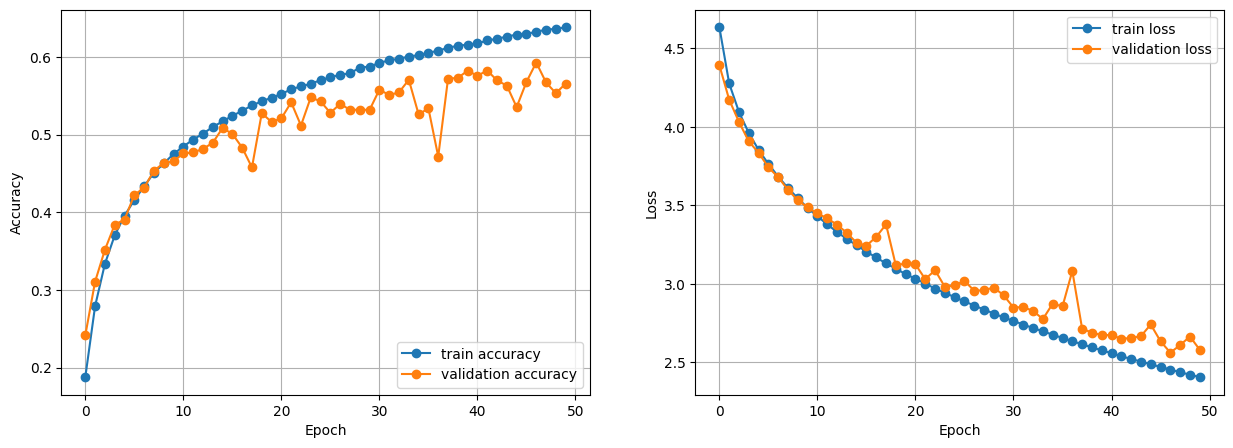

In [19]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(1,2,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

Here, we employed Adam, SGD, and RMSprop as our three optimizers.
We used the Adam optimizer to get the best accuracy while also keeping an eye on modest over-fitting and alterations in accuracy and loss.
We acquired the second greatest accuracy using SGD optimizer.However, out of the three optimizers, we watched the most fluctuates here, which led to over-fitting.
We got less accuracy from the RMSprop optimizer than from the other three. However, it fluctuated less than the SGD did.
Out of the three optimizers, RMSprop and Adam performed quite similarly, whereas SGD performed poorer.


